### DATA PREPROCESSING

In [2]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading dataset
df = pd.read_csv("Lead Scoring.csv",encoding='utf-8')

In [5]:
#reading data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### CHECKING DATASET
- shape
- information
- descriptive statistics

In [6]:
df.shape

(9240, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EDA
- Identifying gaps in data and either filling or deleting them.
- Deleting data that's either unnecessary or irrelevant. 
- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

### CHECKING FOR DUPLICATE VALUES

In [9]:
#In this column the are only unique values so we are checking that are there any duplicated value
df["Prospect ID"].duplicated().sum()==0

True

In [10]:
df["Lead Number"].duplicated().sum()==0

True

In [11]:
df.drop("Prospect ID",axis=1,inplace=True)

In [12]:
df.drop("Lead Number",axis=1,inplace=True)

### CHECKING FOR NULL VALUES

In [13]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### HANDLING NULL VALUES

In [14]:
# "Select" value in all columns is equated to null, hence replacing it with NaN. 
leads=df.replace(["Select","select"],np.NaN)

In [15]:
(leads.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### 1. Dropping columns with null value percentage more than or equal to 39%

In [16]:
#columns which have null value percentage more than 39% can be dropped
leads=leads.loc[:,(leads.isnull().sum()/df.shape[0]*100) <= 39]

In [17]:
(leads.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.0000

### 2. IMPUTATION OF NULL VALUES


In [18]:
#Displaying those columns holding null values
(leads.isnull().sum()/df.shape[0]*100)[(leads.isnull().sum()/df.shape[0]*100)>0.00]


Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
dtype: float64

In [19]:
#Replacing NaNs in categorical cloums with "missing"
cat_null_cols=["Specialization", "Tags", "What matters most to you in choosing a course", 
                 "What is your current occupation","Country","Last Activity","Lead Source"]

for col in cat_null_cols:
    leads[col].replace(np.NaN, "Missing_{}".format(col), inplace = True)

In [20]:
(leads.isnull().sum()/leads.shape[0]*100)[(leads.isnull().sum()/leads.shape[0]*100) > 0.00]

TotalVisits             1.482684
Page Views Per Visit    1.482684
dtype: float64

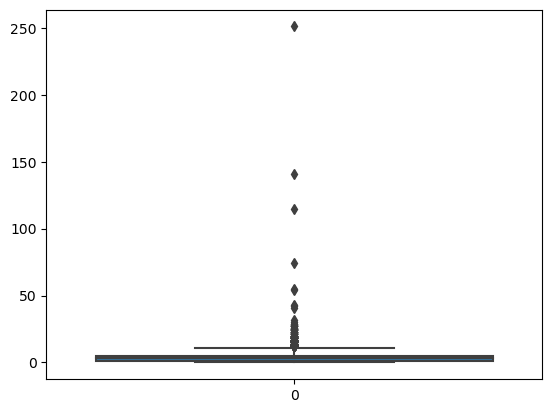

In [21]:

#Handling numeric columns holding null values
sns.boxplot(leads["TotalVisits"])
plt.show()

### 2.1 Outlier treatment of TotalVisits

In [22]:
#imputing null values with median,as column contains outliers
leads["TotalVisits"].describe(percentiles=[0.9,0.95,0.99,0.995,0.999])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
50%         3.000000
90%         7.000000
95%        10.000000
99%        17.000000
99.5%      21.000000
99.9%      31.796000
max       251.000000
Name: TotalVisits, dtype: float64

In [23]:
#In the above descriptive statistics show the total visits count increasing dramatically from 99.9% to 100%
#Therefore, it is considered to be an outlier and need to be handled
leads.TotalVisits[leads["TotalVisits"] >21]=21

In [24]:
# Imputing NaNs with median, as the column contains null values.
leads["TotalVisits"].fillna(leads["TotalVisits"].median(), inplace = True)

<Axes: >

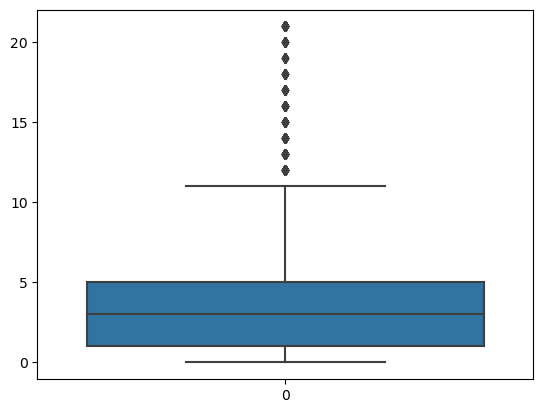

In [25]:
#Boxplot After removing outliers
sns.boxplot(leads["TotalVisits"])

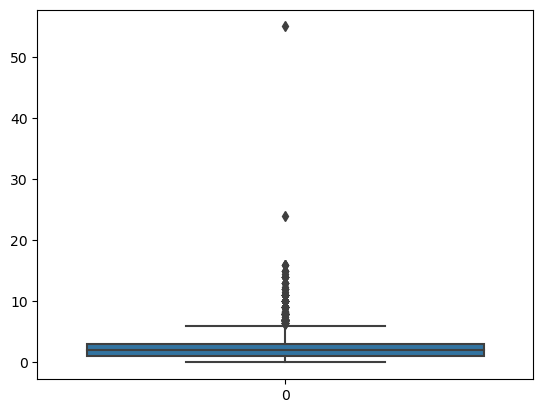

In [26]:
#Handling "Page views per visit" column
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

In [27]:
# Imputing NaNs with median, as the column contains null values.
leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].median(), inplace = True)

### 2.2 Outlier treatment of "Page Views Per Visit"

In [29]:
leads["Page Views Per Visit"].describe(percentiles=[0.9,0.95,0.99,0.995,0.999])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
50%         2.000000
90%         5.000000
95%         6.000000
99%         9.000000
99.5%      11.000000
99.9%      14.380500
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [30]:
# The above descriptive statistics displays the unusual increase in the Page Views Per Visit count from 99.9% to 100%.
# It is considered to be an outlier and needs to be handled
leads["Page Views Per Visit"][leads["Page Views Per Visit"] >15] =15

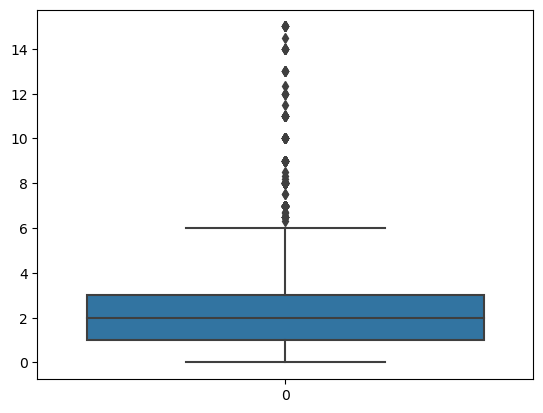

In [31]:
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

### Scrubbing inessential columns

In [32]:
#list the categorical column from dataset
cat_col=leads.columns[leads.dtypes=="object"]

In [33]:
#Dropping the columns from the dataset which includes only one category,as it wont interpret significant information
for col in cat_col:
    if len(leads[col].unique())==1:
        leads.drop(col,axis =1,inplace=True)
    
    
    

In [34]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
cat_col.shape

(23,)

### Analysis of numerical columns

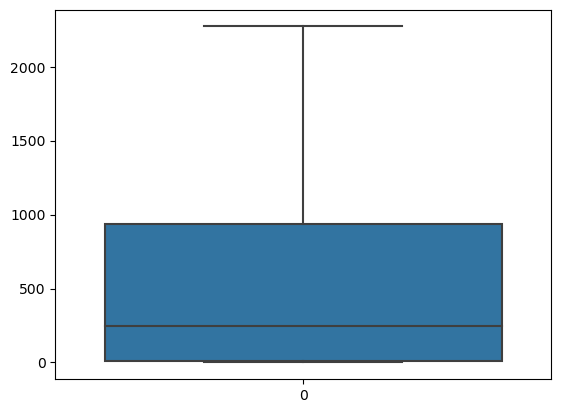

In [36]:
sns.boxplot(leads["Total Time Spent on Website"])
plt.show()

### Inferences:
- No visible outliers.

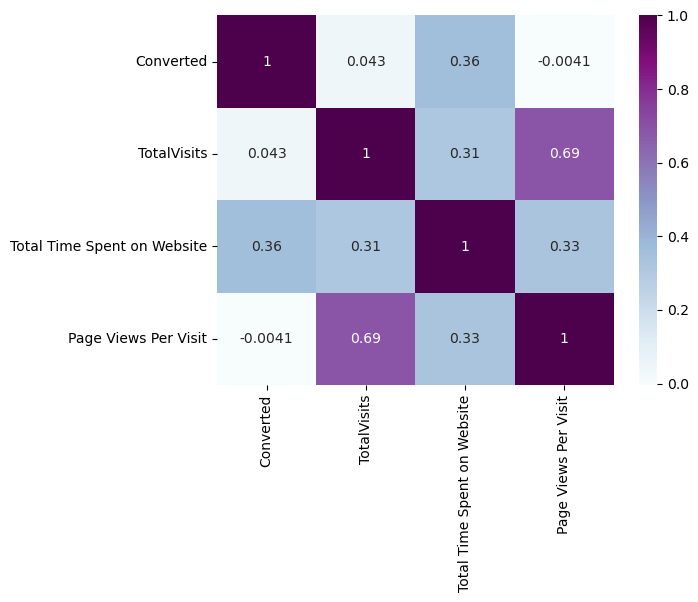

In [37]:
sns.heatmap(leads[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(),annot = True,cmap = "BuPu")
plt.show()

### Inferences:
- Positive correlation observed in TotalVisits and Page Views Per Visit.

### Bivariate Analysis of Categorical columns

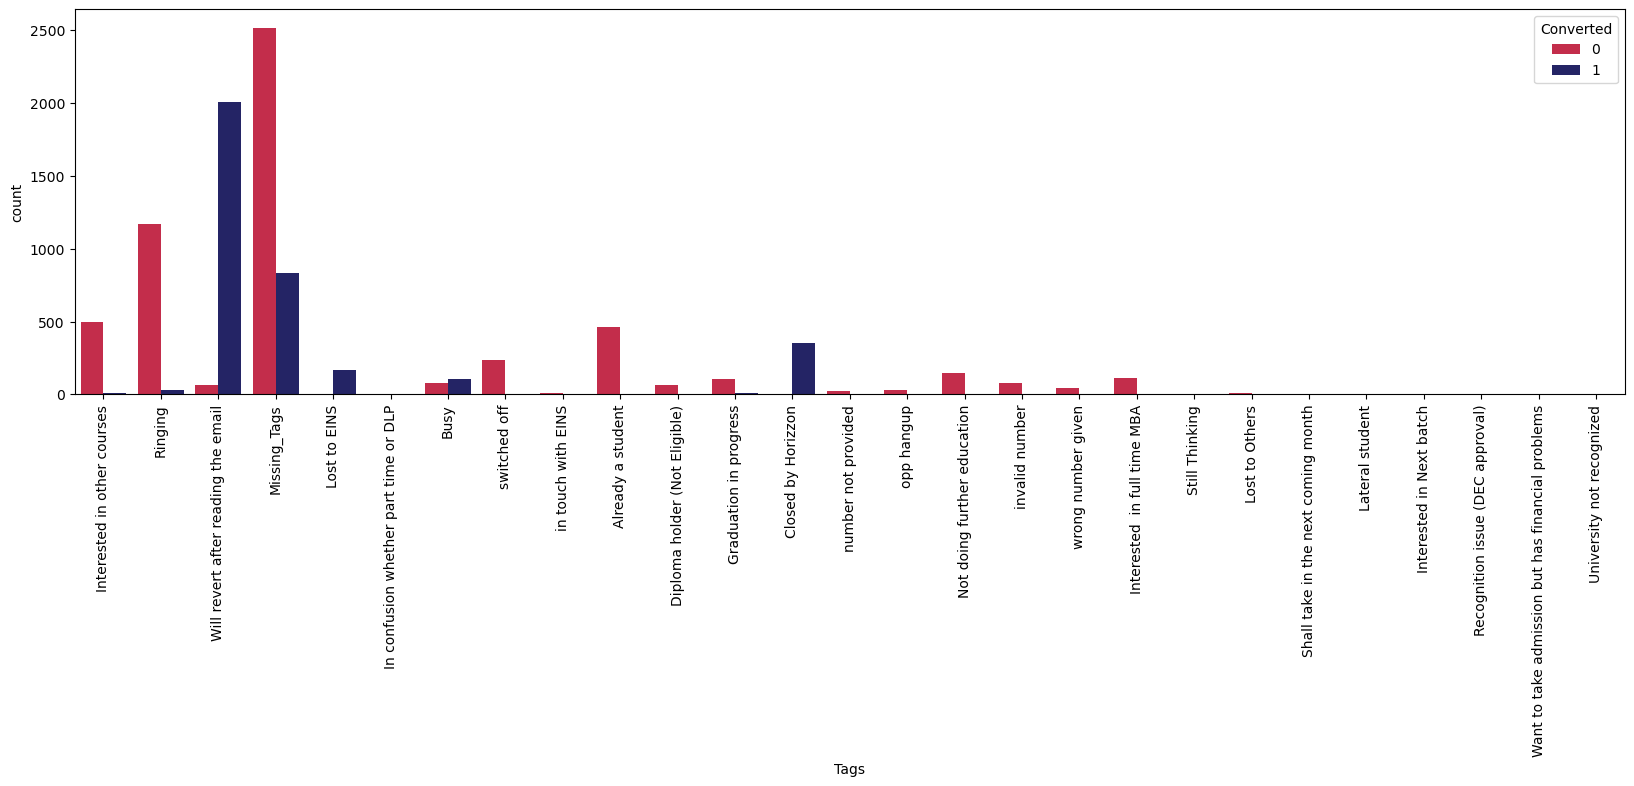

In [38]:
#plotting Tags column
plt.figure(figsize=(20,5))
sns.countplot(x=leads["Tags"],hue=leads["Converted"],palette=["crimson","midnightblue"])
plt.xticks(rotation=90)
plt.show()

### Inferences:
- Positive Conversion rate is observed in "Will revert after reading the email", followed by "Closed by Horizzon".
- Few columns are observed with negligible count of conversions, insignificant.

In [39]:
# Grouping certain categories under "Misc_tags", after contemplating above visualization and concluding insignificant.

leads["Tags"].replace(["invalid number", "wrong number given","number not provided", "Still Thinking","Lost to Others", 
                       "Shall take in the next coming month","Lateral student","Interested in Next batch", 
                       "Recognition issue (DEC approval)", "Want to take admission but has financial problems",
                       "University not recognized", "Diploma holder (Not Eligible)", "in touch with EINS",
                       "In confusion whether part time or DLP", "opp hangup"], "Misc_Tags", inplace = True)

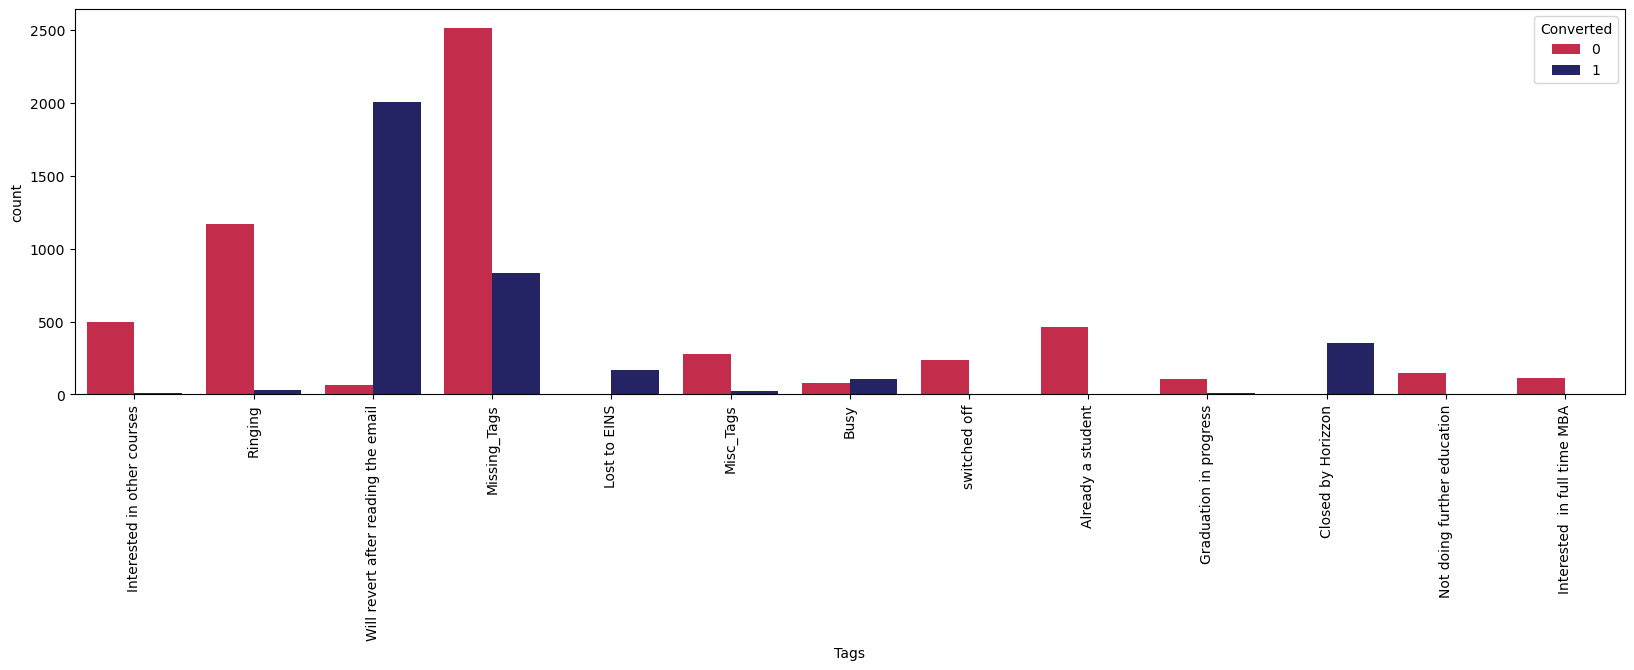

In [40]:
# Plotting after grouping tags
plt.figure(figsize=(20,5))
sns.countplot(x=leads["Tags"],hue=leads["Converted"],palette=["crimson","midnightblue"])
plt.xticks(rotation=90)
plt.show()

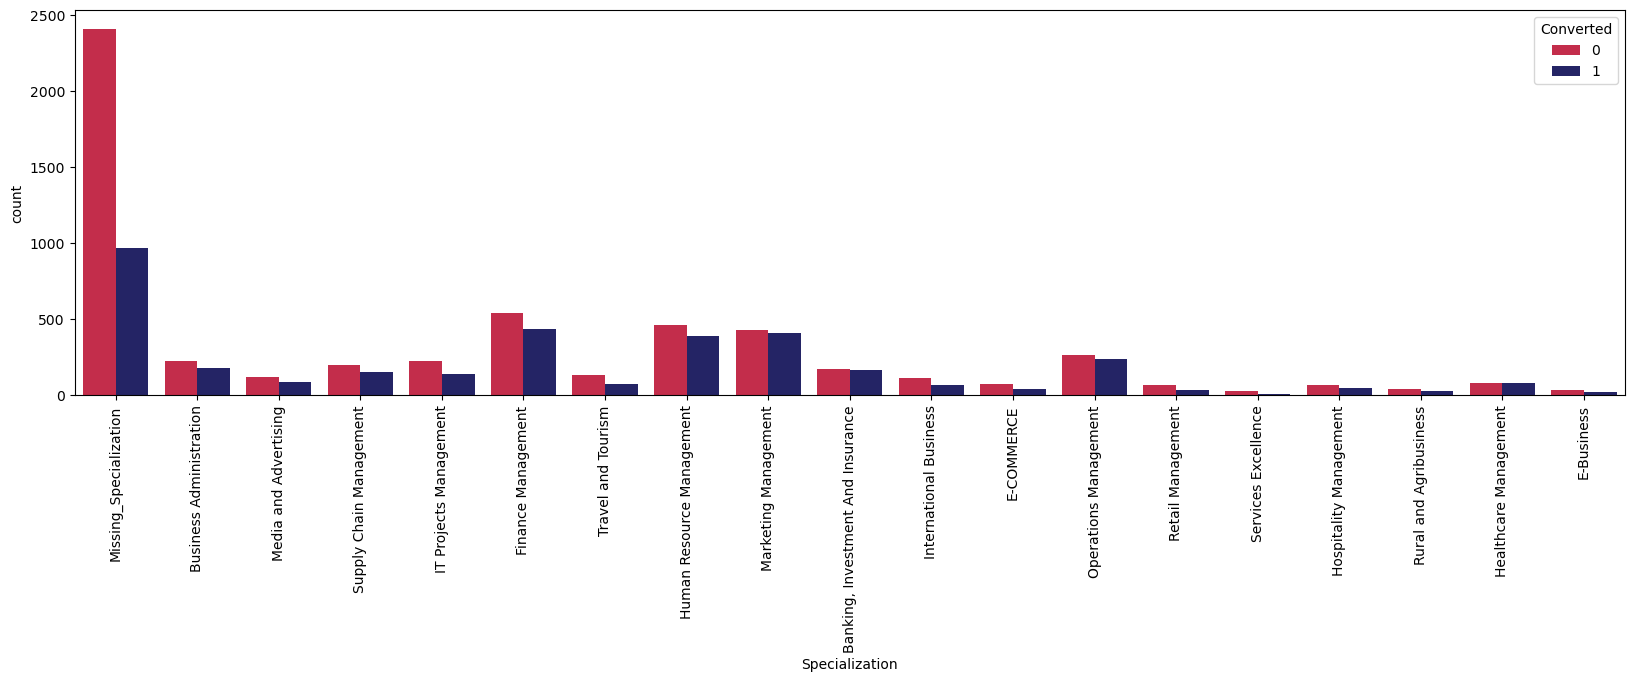

In [41]:
#plotting specification column 
plt.figure(figsize=(20,5))
sns.countplot(x=leads["Specialization"],hue=leads["Converted"],palette=["crimson","midnightblue"])
plt.xticks(rotation=90)
plt.show()

### Inferences:
- Positive conversion rate is observed in "Finance Management", "Human Resouce Management", "Marketing Management","Operations Management" specialization. 
- Certain columns are found insignificant.

In [42]:
# Grouping certain categories under "Misc_tags", after contemplating above visualization and concluding insignificant.
leads["Specialization"].replace(["Services Excellence", "Retail Management", 
                                 "Hospitality Management", "Rural and Agribusiness","Healthcare Management", "E-Business",
                                "E-COMMERCE"], "Misc_Specialization",inplace = True)

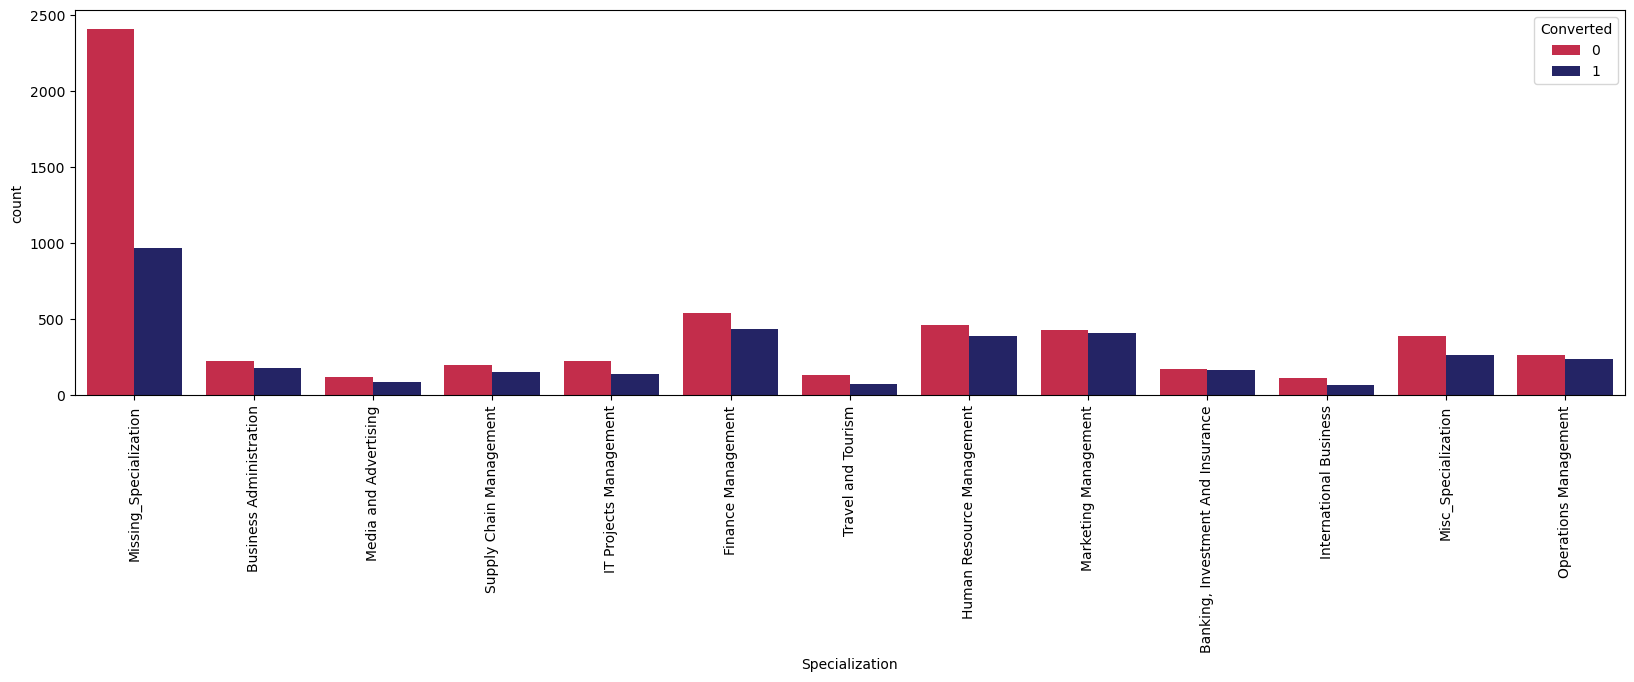

In [43]:
#plotting after grouping specialization
plt.figure(figsize=(20,5))
sns.countplot(x=leads["Specialization"],hue=leads["Converted"],palette=["crimson","midnightblue"])
plt.xticks(rotation=90)
plt.show()

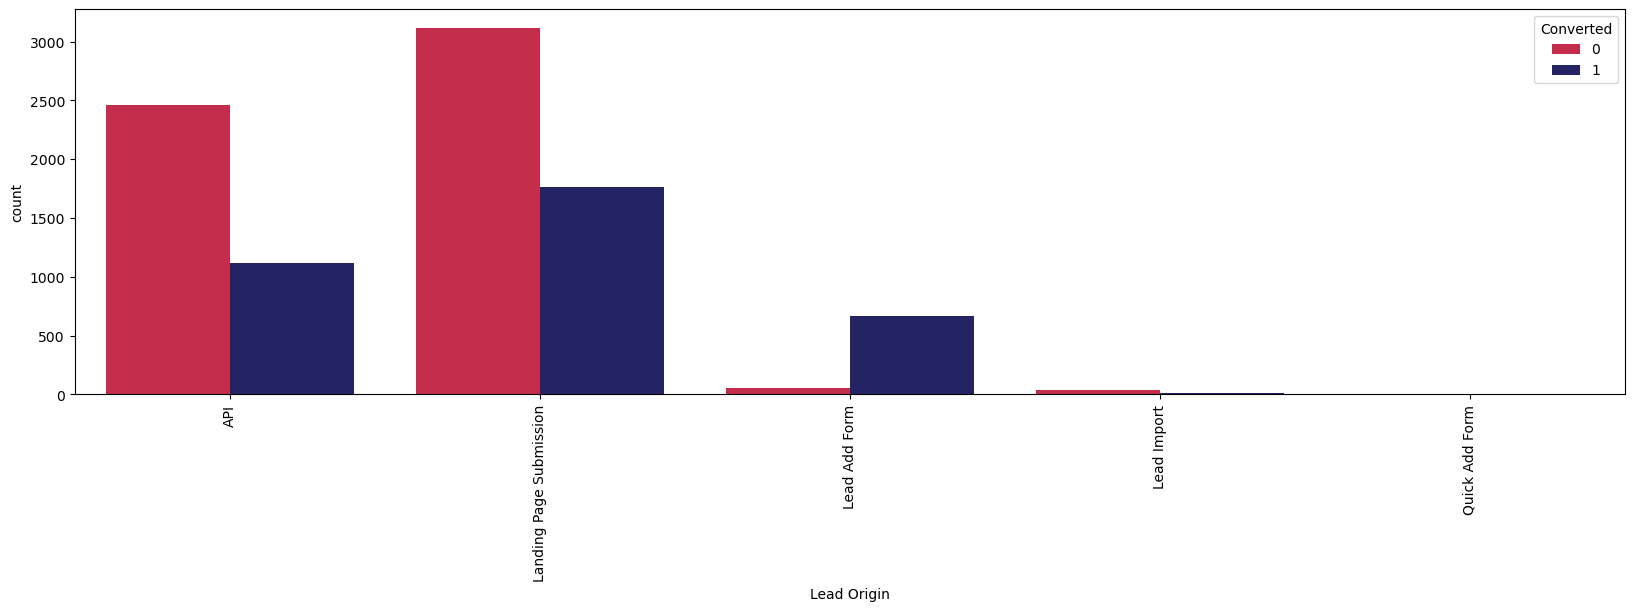

In [44]:
plt.figure(figsize=(20,5))
sns.countplot(x=leads["Lead Origin"],hue=leads["Converted"],palette=["crimson","midnightblue"])
plt.xticks(rotation=90)
plt.show()

### Inferences:
- Positive conversion rate observed in "Landing Page Submission", followed by "API" Lead Origin.

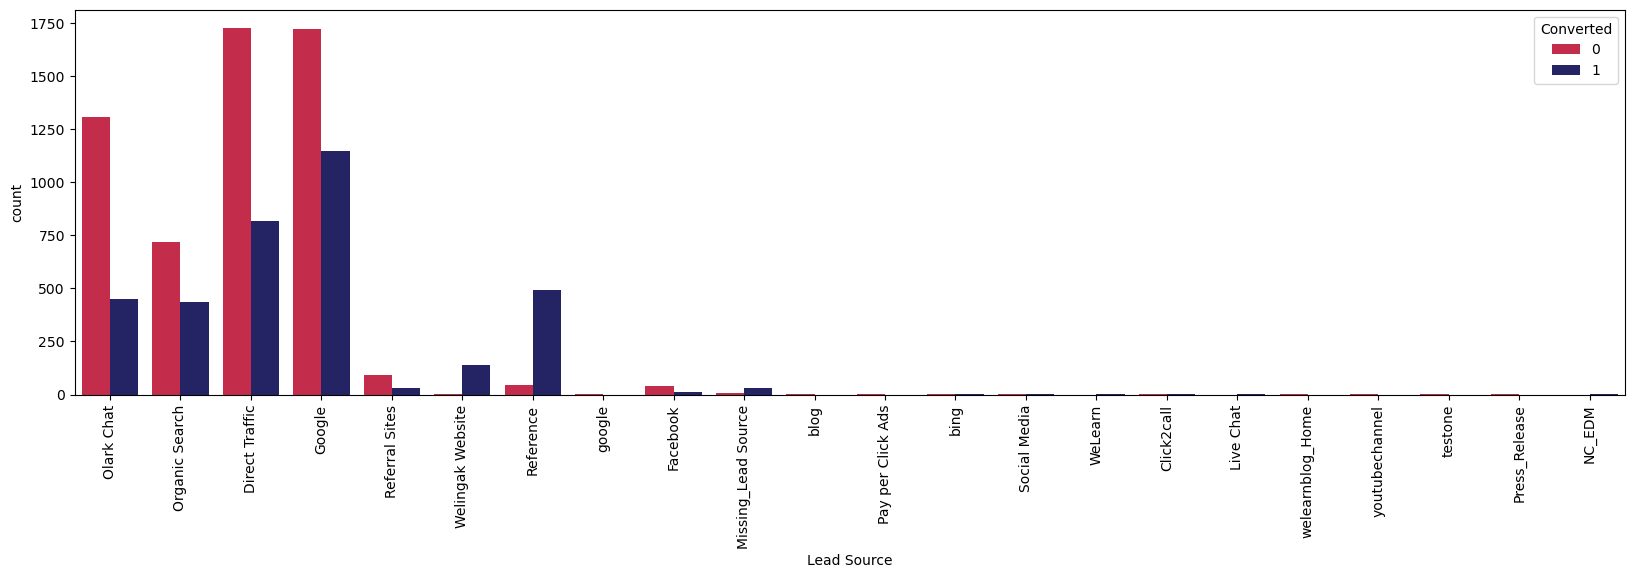

In [45]:
#ploting lead source column
plt.figure(figsize = (20,5))
sns.countplot(x=leads["Lead Source"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

In [46]:

# Replacing and grouping certain categories
leads["Lead Source"].replace("google","Google",inplace = True)
leads["Lead Source"].replace("Facebook","Social Media",inplace = True)
leads["Lead Source"].replace(["welearnblog_Home","WeLearn","blog","bing","Click2call", "Live Chat", 
                              "youtubechannel", "testone","Press_Release","NC_EDM","Pay per Click Ads"],
                             "Misc_Lead Source",inplace = True)

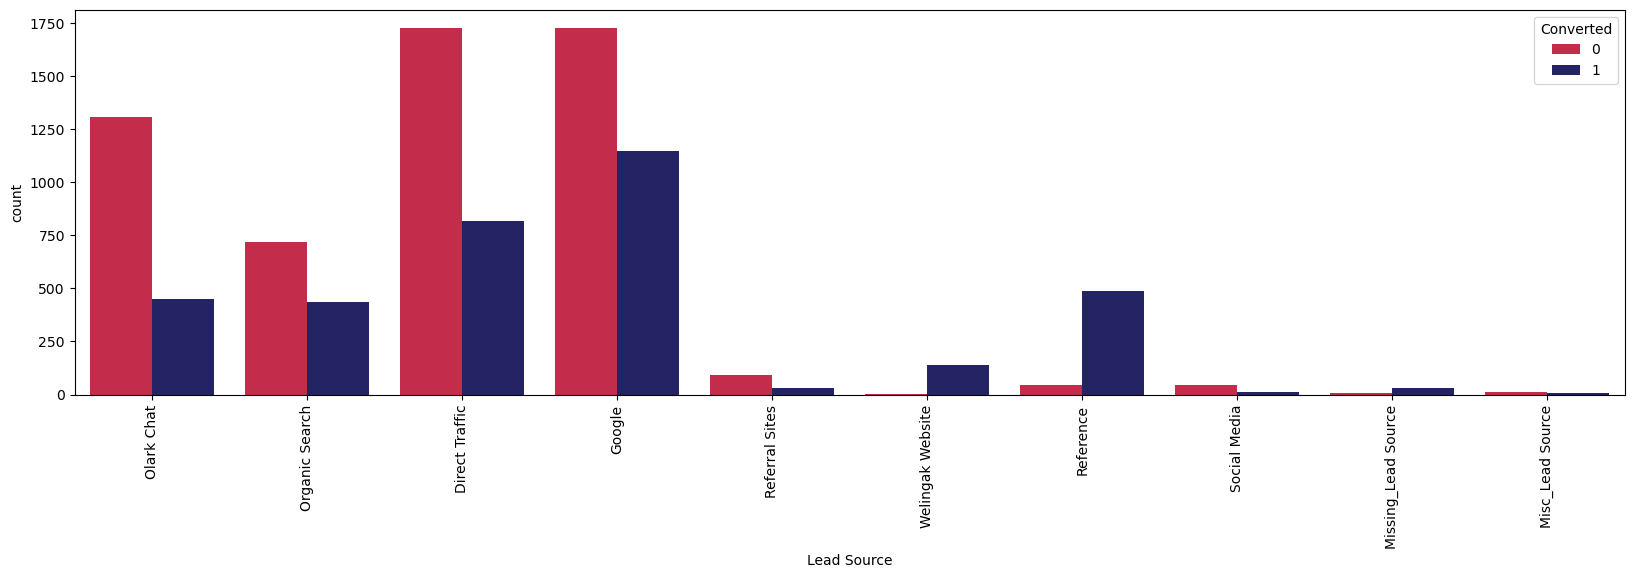

In [47]:
#plotting after grouping lead source 
plt.figure(figsize = (20,5))
sns.countplot(x=leads["Lead Source"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- positive conversion rate noticed in "Google" and "Direct Traffic"


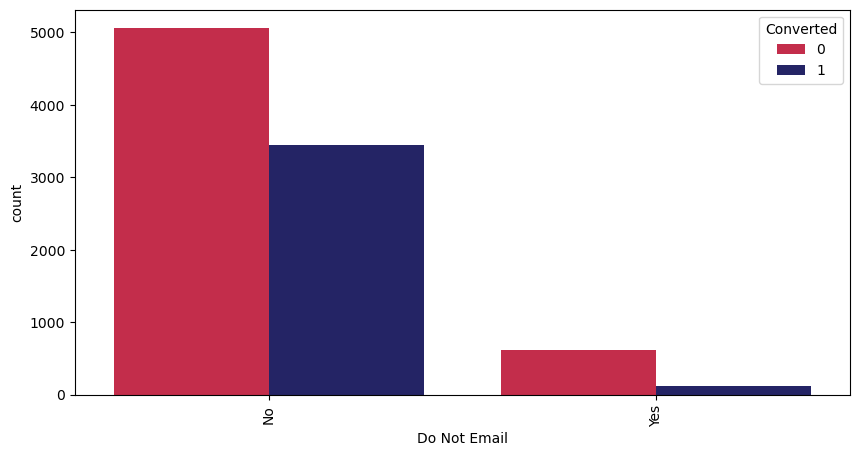

In [48]:
#plotting Do not Email column
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Do Not Email"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- No signification conclusion


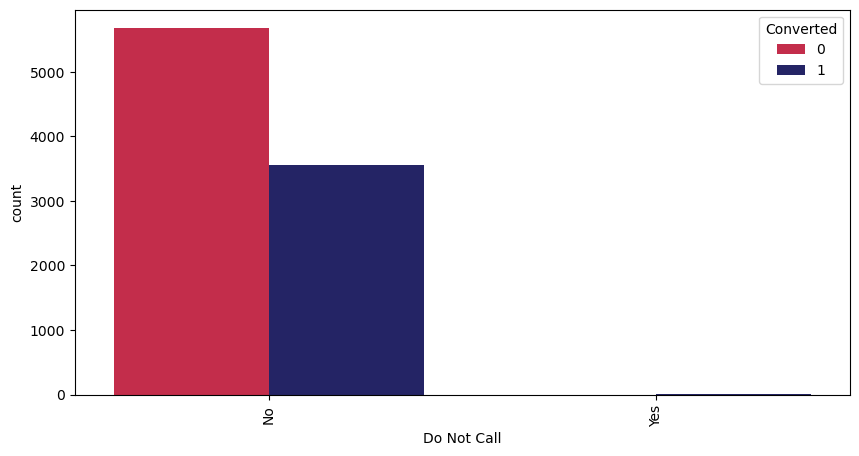

In [49]:
#plotting Do not call column
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Do Not Call"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- The column is imbalanced.Hence, can be safely dropped.


In [50]:
leads.drop("Do Not Call",axis=1,inplace=True)

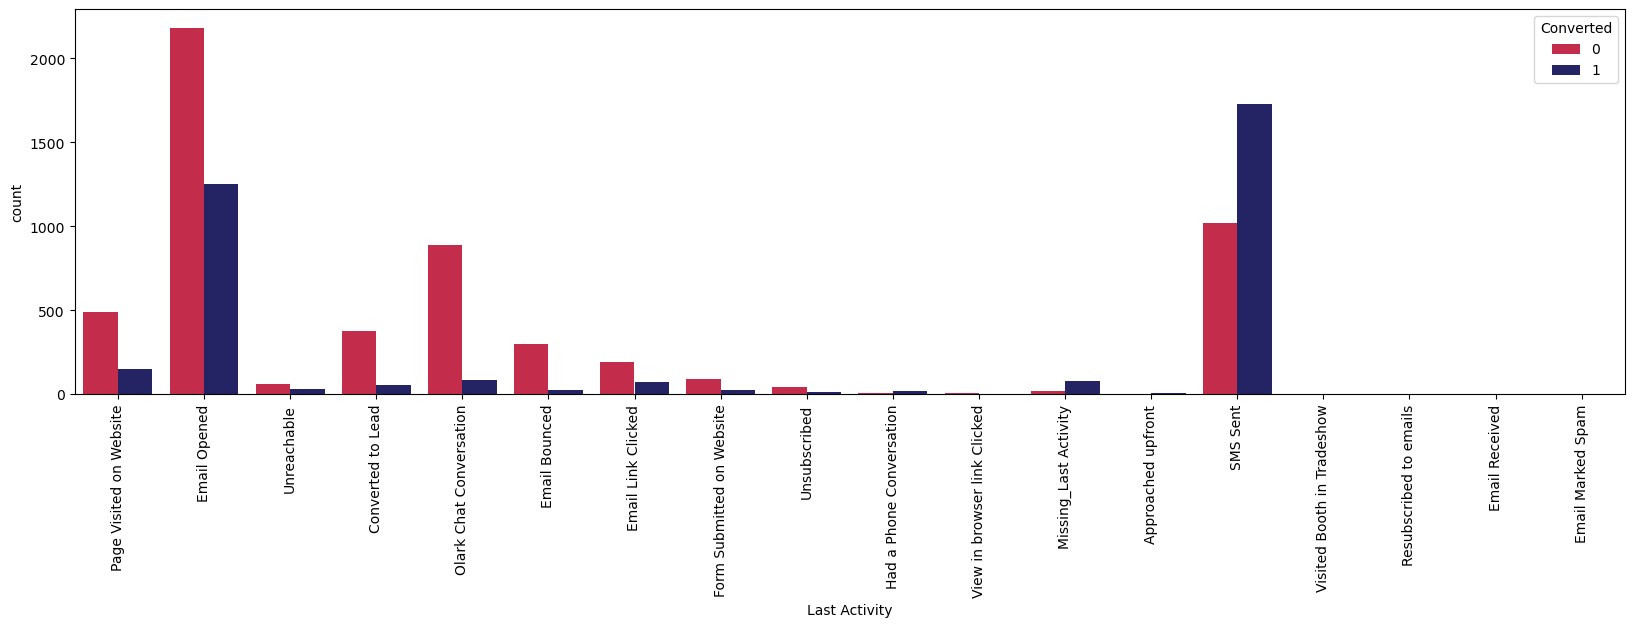

In [51]:
#plotting last Activity column
plt.figure(figsize = (20,5))
sns.countplot(x=leads["Last Activity"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

In [52]:
# Grouping certain last activity categories under Miscellaneous

leads["Last Activity"].replace(["Unsubscribed","Approached upfront","Resubscribed to emails", 
                                "Email Received","Email Marked Spam","Visited Booth in Tradeshow", 
                                "View in browser link Clicked","Had a Phone Conversation","Unreachable"],
                               "Misc_Last Activity", inplace = True)

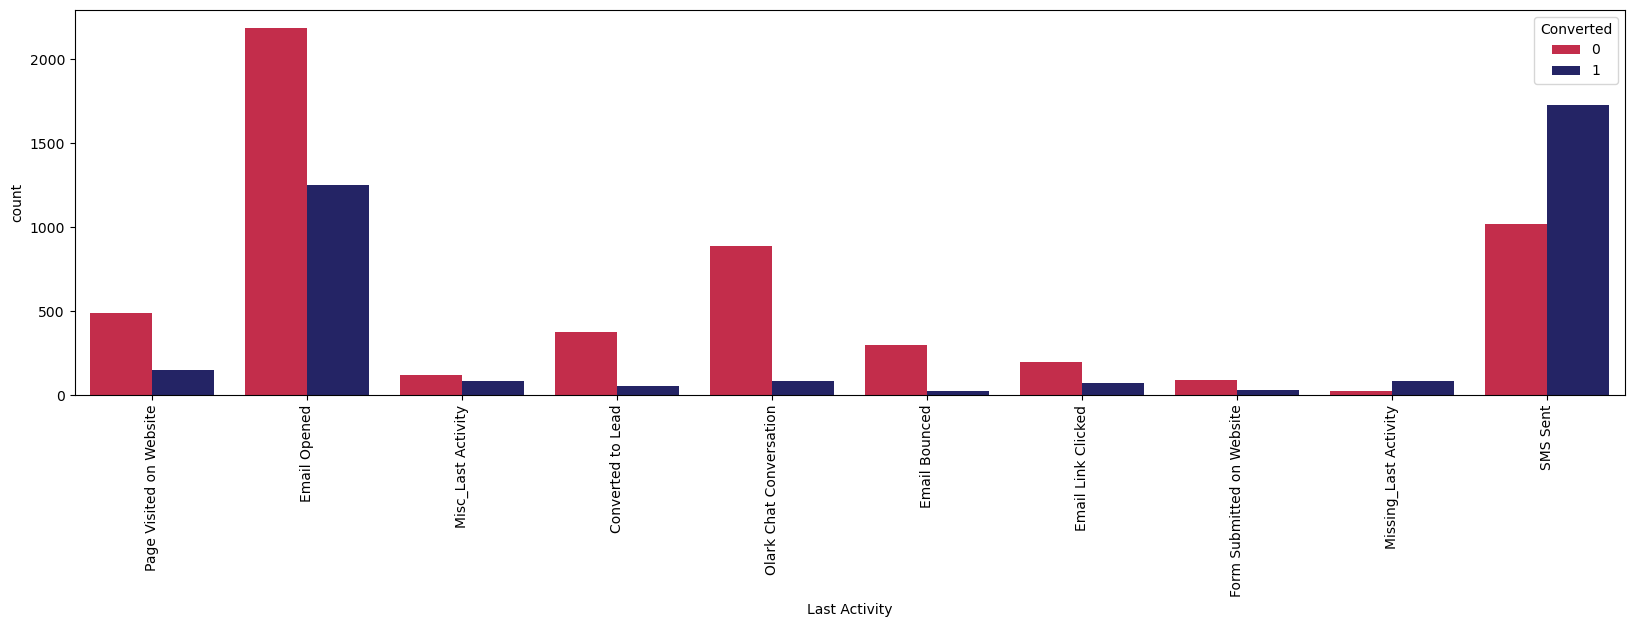

In [53]:
#plotting last activity after grouping
plt.figure(figsize = (20,5))
sns.countplot(x=leads["Last Activity"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- Positive conversion rate observed in "Email Opened" and "SMS Sent" Last Activity.

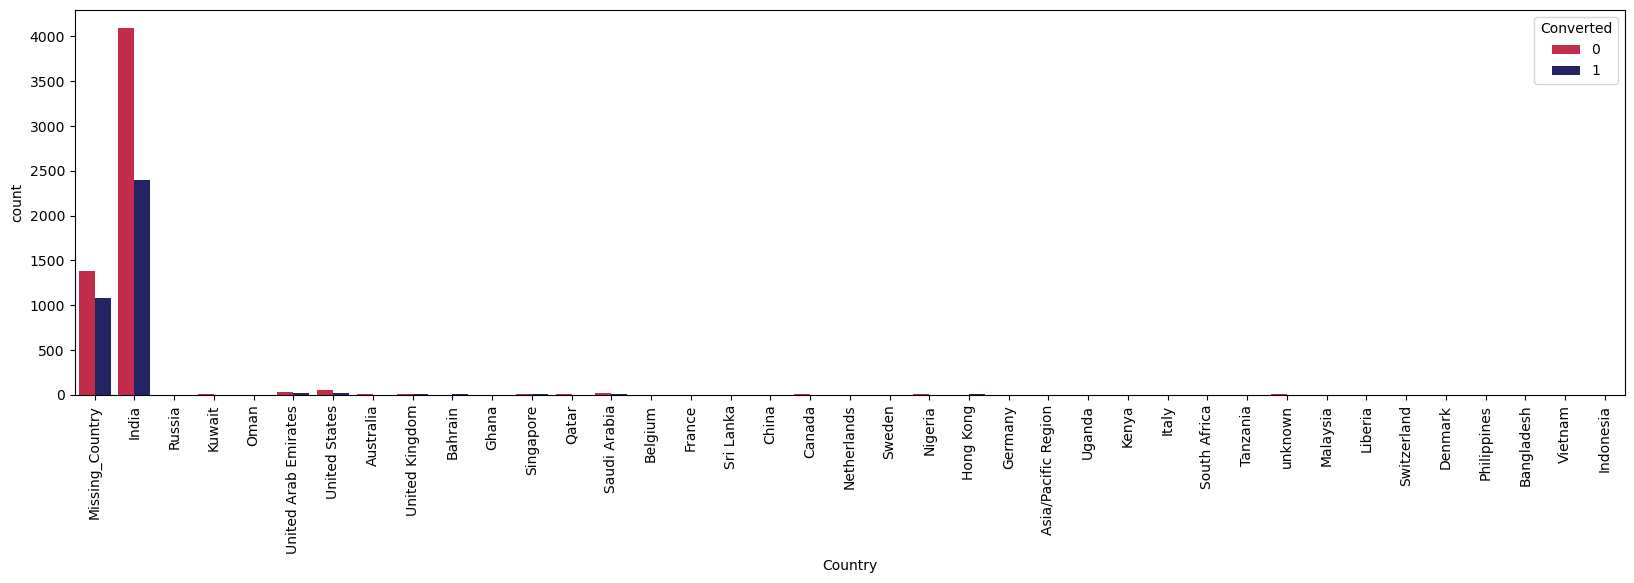

In [54]:
#plotting country column
plt.figure(figsize = (20,5))
sns.countplot(x=leads["Country"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- No significant information concluded. Hence, dropping it.



In [55]:
leads.drop("Country", axis = 1, inplace = True)

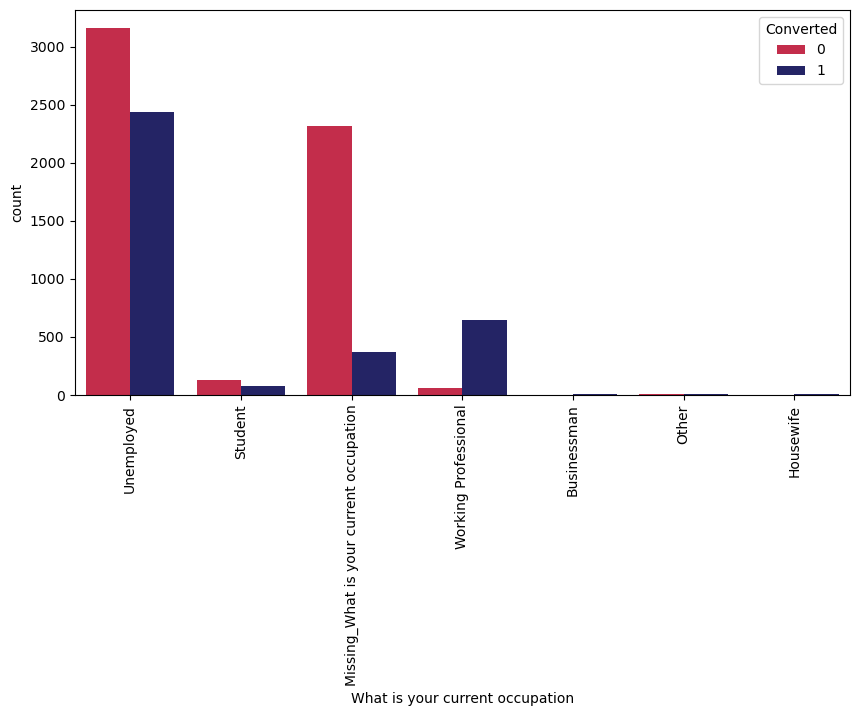

In [56]:
#plotting What is your current occupation column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["What is your current occupation"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:
- Positive conversion rate observed in unemployed applicants.



In [57]:
leads["What is your current occupation"].replace(["Businessman","Housewife"], "Other", inplace = True)

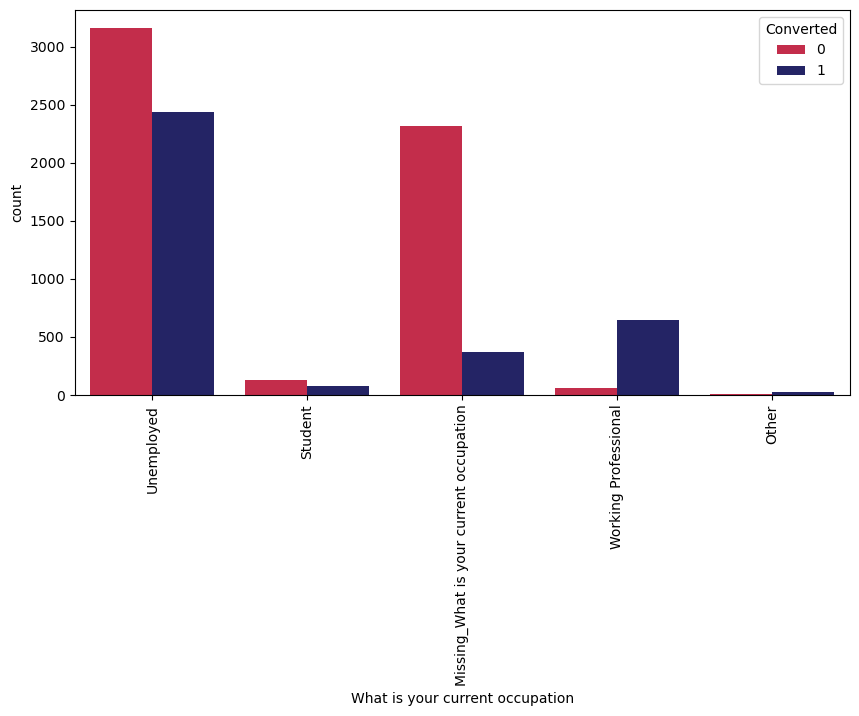

In [58]:
#plotting after grouping
plt.figure(figsize = (10,5))
sns.countplot(x=leads["What is your current occupation"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

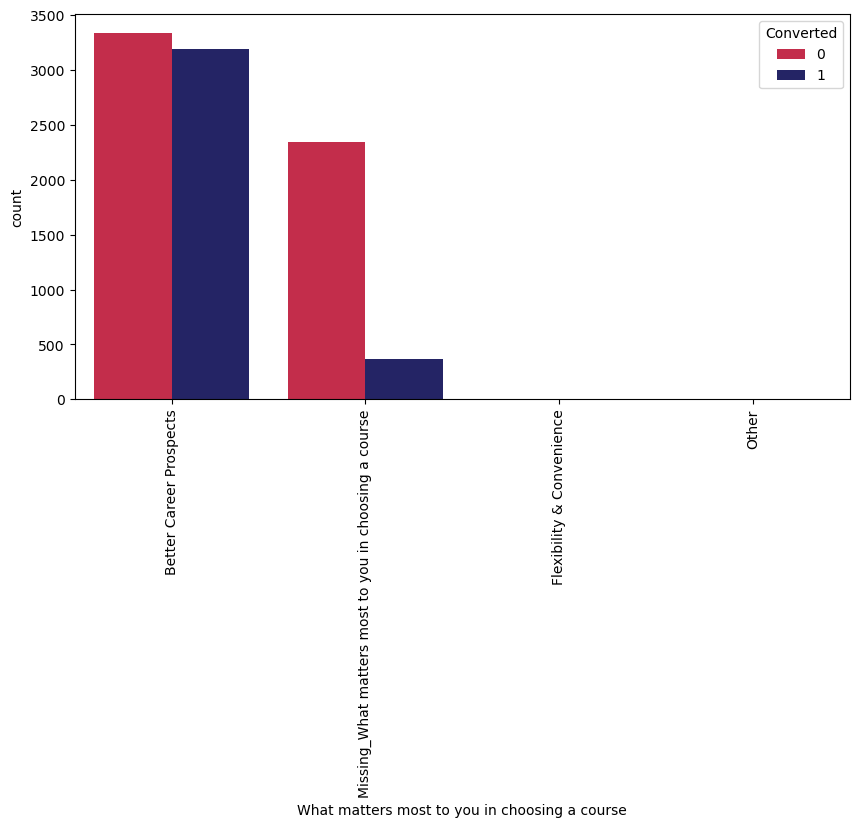

In [59]:
#plotting What matters most to you in choosing a course column
plt.figure(figsize = (10,5))
sns.countplot(x=leads["What matters most to you in choosing a course"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Positive conversion rate observed with the motive to improvise career prospects.



In [60]:
# Grouping insignificant entries into Other.
leads["What matters most to you in choosing a course"].replace("Flexibility & Convenience","Other",inplace = True)

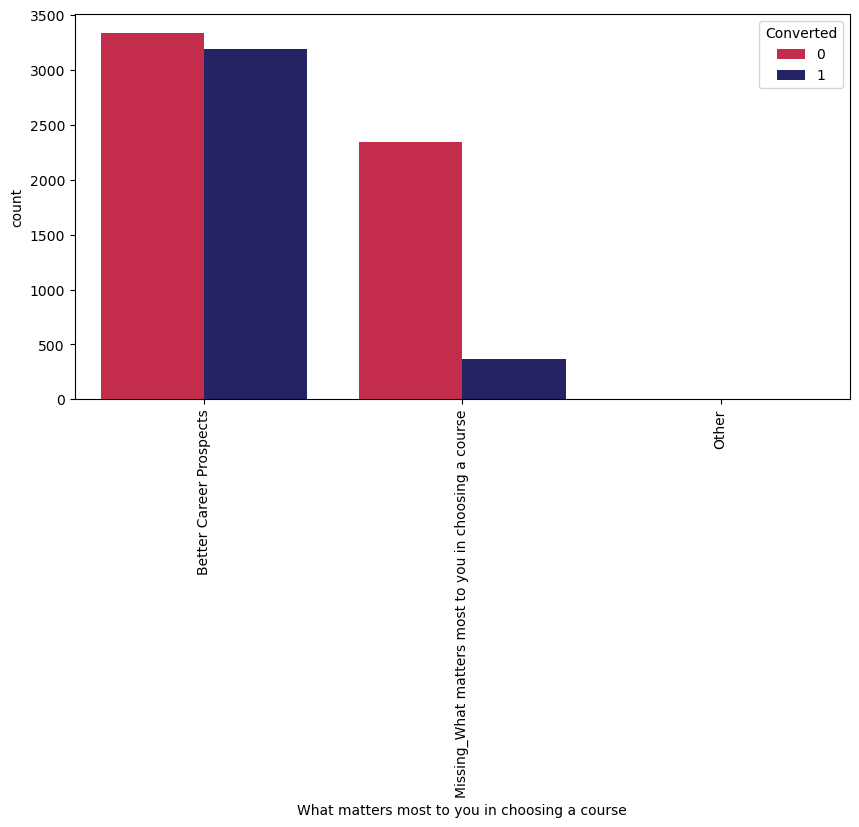

In [61]:
#plotting after grouping
plt.figure(figsize = (10,5))
sns.countplot(x=leads["What matters most to you in choosing a course"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

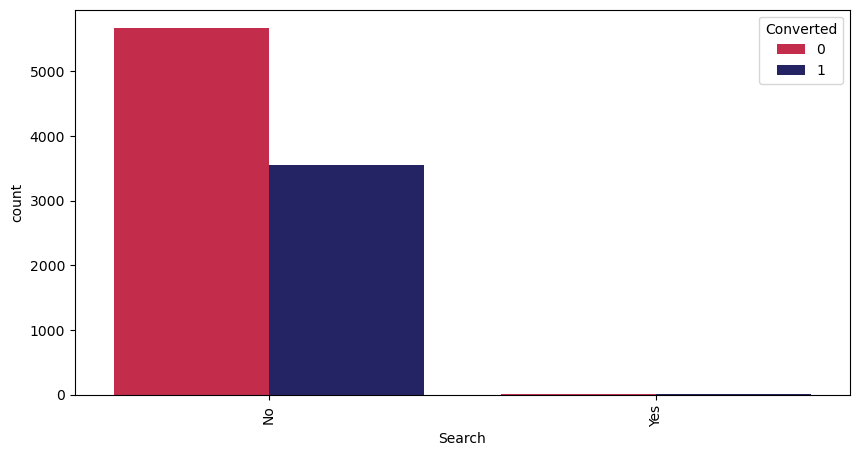

In [62]:
#plotting search column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Search"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Imbalanced categories observed, insignificant feature. Hence, dropping it.



In [63]:
leads.drop("Search",axis=1,inplace=True)

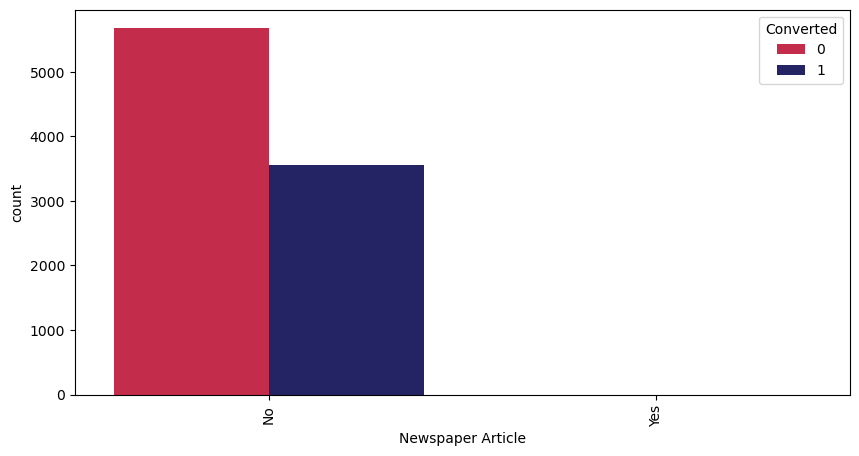

In [64]:
#plotting Newspaper Article column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Newspaper Article"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Infereces:

- Imbalanced categories observed, insignificant feature. Hence, dropping it.



In [65]:
leads.drop("Newspaper Article", axis = 1, inplace = True)

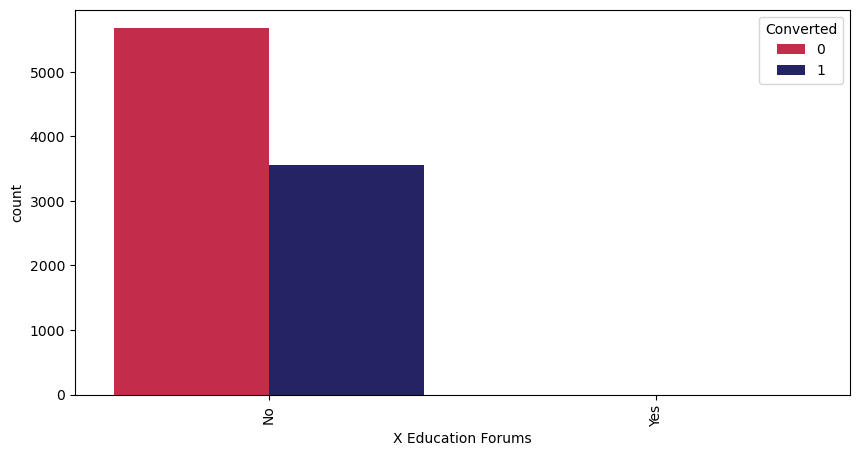

In [66]:
#plotting X Education Forums column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["X Education Forums"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Imbalanced categories observed, insignificant feature. Hence, dropping it.



In [67]:
leads.drop("X Education Forums",axis = 1, inplace = True)

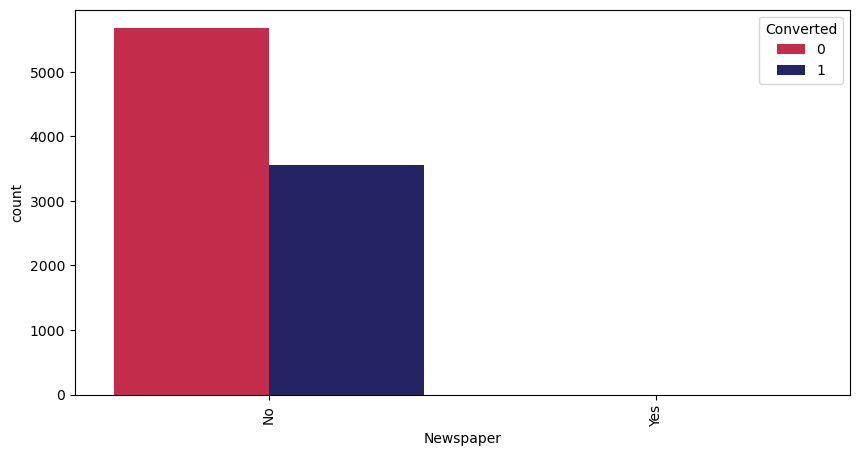

In [68]:
#plotting Newspaper column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Newspaper"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Imbalanced categories observed, insignificant feature. Hence, dropping it.



In [69]:
leads.drop("Newspaper",axis = 1, inplace = True)

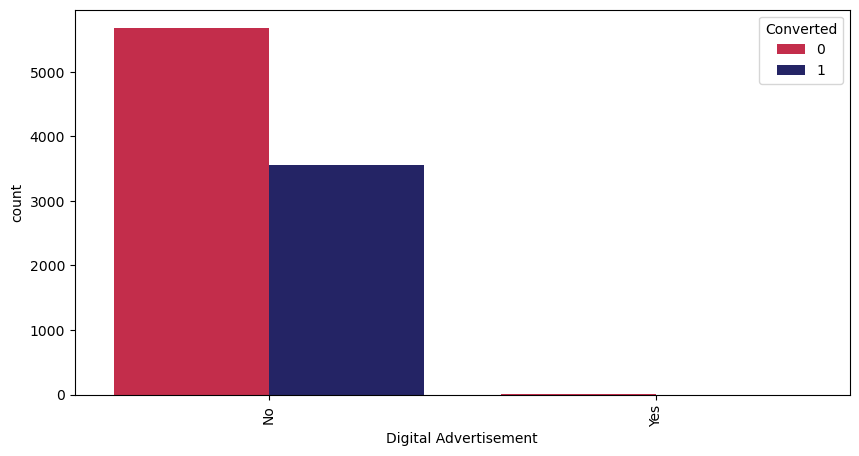

In [70]:
#plotting Digital Advertisement  Forums column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Digital Advertisement"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Imbalanced categories observed, insignificant feature. Hence, dropping it.



In [71]:
leads.drop("Digital Advertisement",axis = 1, inplace = True)

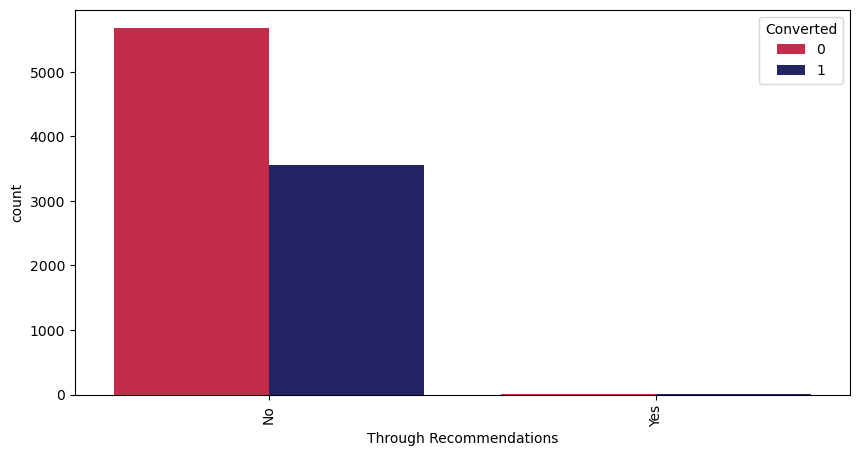

In [72]:
#plotting  "Through Recommendations" column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Through Recommendations"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Imbalanced categories observed, insignificant feature. Hence, dropping it.



In [73]:
leads.drop("Through Recommendations",axis = 1, inplace = True)

In [74]:
leads.shape

(9240, 14)

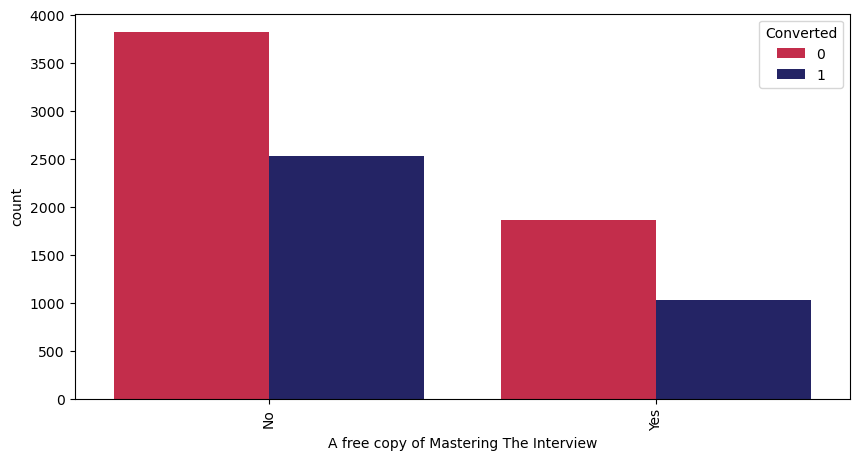

In [75]:
#plotting A free copy of Mastering The Interview  column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["A free copy of Mastering The Interview"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Positive conversion rate observed in both the categories.



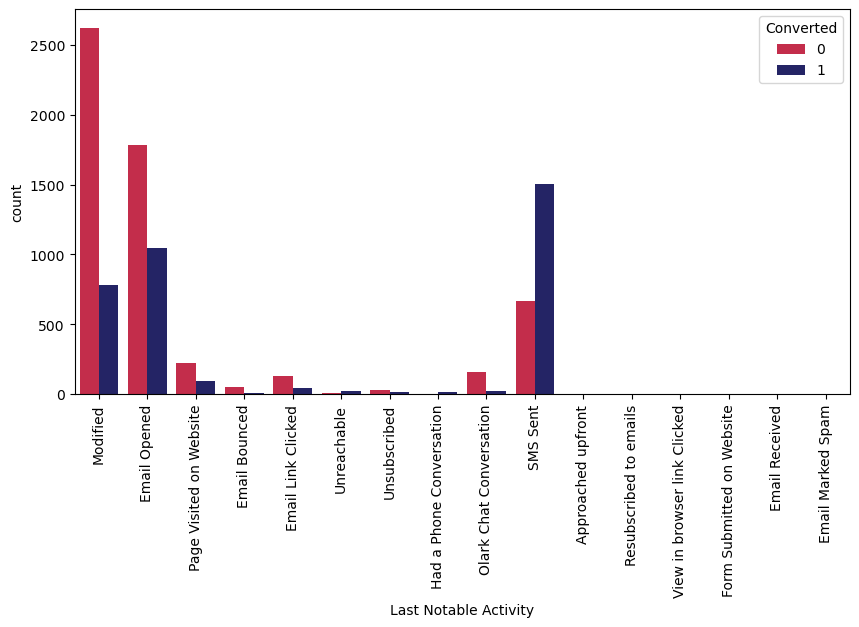

In [76]:
#plotting "Last Notable Activity"   column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Last Notable Activity"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

In [77]:
# Grouping insignificant categories as Miscellaneous
leads["Last Notable Activity"].replace(["Email Received","Form Submitted on Website",
                                        "View in browser link Clicked","Resubscribed to emails","Email Marked Spam",
                                       "Had a Phone Conversation","Unreachable","Unsubscribed","Approached upfront"],
                                       "Misc_Last Notable Activity", inplace = True)

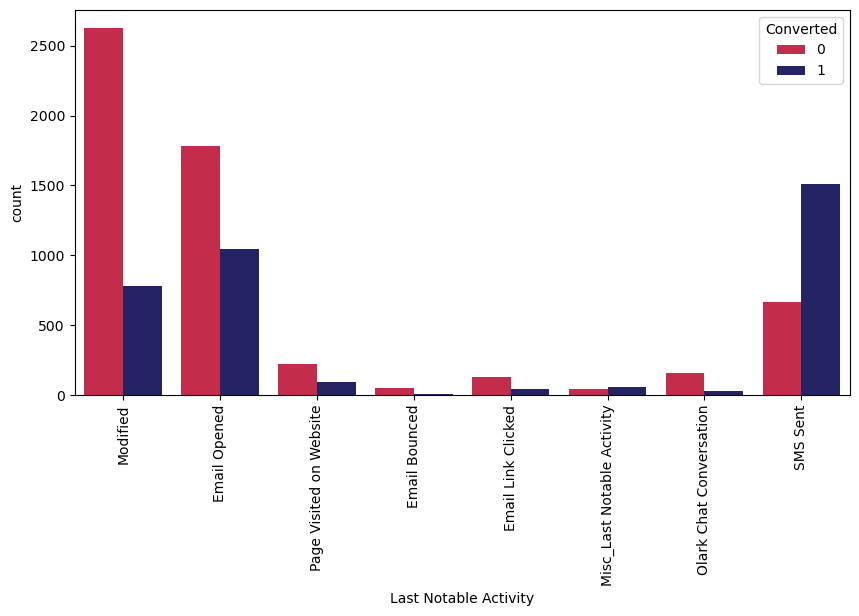

In [78]:
#plotting after grouping "Last Notable Activity"column 
plt.figure(figsize = (10,5))
sns.countplot(x=leads["Last Notable Activity"], hue = leads["Converted"], palette = ["crimson","midnightblue"])
plt.xticks(rotation = 90)
plt.show()

### Inferences:

- Positive conversion rate observed in "SMS Sent", followed by "Email Opened" Last notable activity.



In [79]:
leads.drop("Last Activity", axis = 1, inplace = True)

### Inferences:

- Based on the above contingency table, it can be concluded that "Last Activty" and "Last Notable Activity" are observed to hold similar values. It is safe to drop either of them.



### Data Preparation

- Substitute dummy variables for categorical columns.
- Train-Test Split.
- Data transformation by scaling features.



### Substituting dummy variables for categorical columns

In [80]:
# Listing categorical columns from dataset
cat_cols = leads.columns[leads.dtypes == "object"]

In [81]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
# Dummy variables for categorical columns 
dummy_df = pd.get_dummies(leads[cat_cols], drop_first = True)

In [83]:
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Misc_Lead Source,Lead Source_Missing_Lead Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Tags_Will revert after reading the email,Tags_switched off,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Misc_Last Notable Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [84]:
dummy_df.shape

(9240, 52)

In [85]:
# Dropping original categorical columns from dataset
leads.drop(cat_cols, axis = 1, inplace = True)

In [86]:
# Concatenating dummy variables dataframe and leads dataset
leads = pd.concat([leads,dummy_df],axis = 1)

In [87]:
leads.shape

(9240, 56)

In [88]:
leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Misc_Lead Source', 'Lead Source_Missing_Lead Source',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Misc_Specialization',
       'Specialization_Missing_Specialization',
       'Specialization_Operati

### Train-Test Split


In [89]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [90]:
df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)

In [91]:
df_train.shape, df_test.shape

((6468, 56), (2772, 56))

### Feature scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler
num_cols = ["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"]

scaler = MinMaxScaler()

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])

In [93]:
y_train = df_train.pop("Converted")
X_train = df_train
y_test= df_test.pop("Converted")
X_test = df_test

### MODEL BUILDING

# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [95]:
lr.fit(X_train,y_train)

LogisticRegression()

In [96]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

### CONFUSION MATRIX

In [97]:

from sklearn.metrics import confusion_matrix
cmatrix=confusion_matrix(y_test,y_pred)

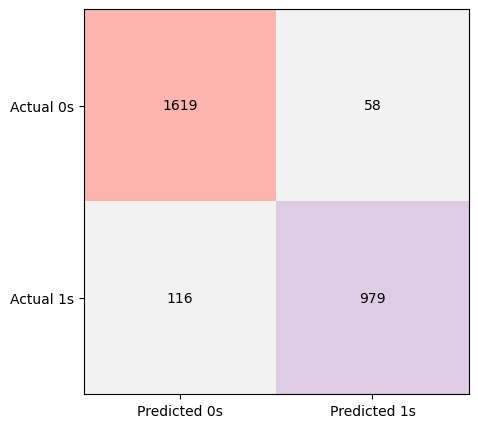

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cmatrix, cmap = "Pastel1_r")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black')
plt.show()

### CLASSIFICATION REPORT


In [99]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1677
           1       0.94      0.89      0.92      1095

    accuracy                           0.94      2772
   macro avg       0.94      0.93      0.93      2772
weighted avg       0.94      0.94      0.94      2772



<Axes: ylabel='Feature'>

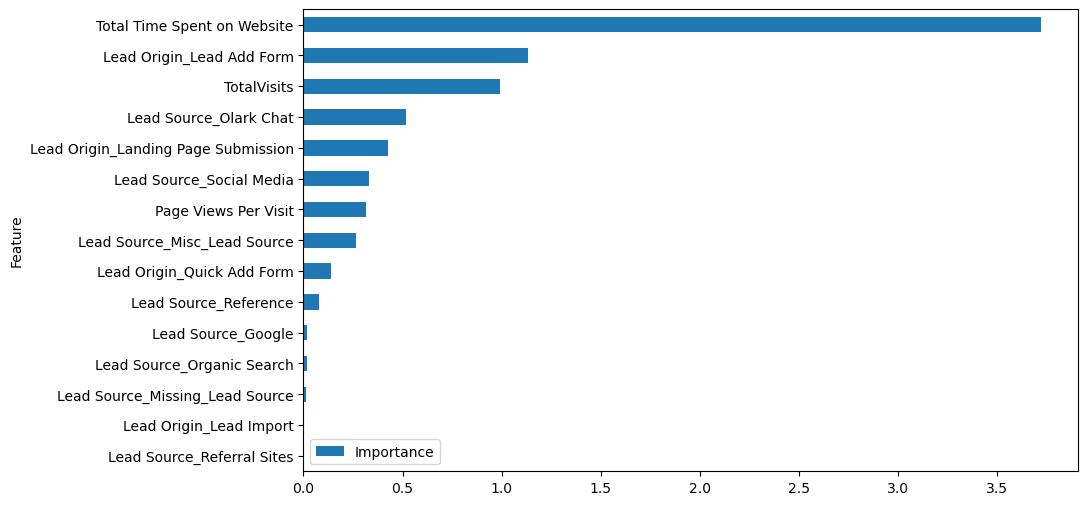

In [103]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance[:15].sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### CROSS VALIDATION

In [104]:
from sklearn.model_selection import cross_val_score
print("Train dataset:",round(cross_val_score(lr,X_train, y_train,cv=5).mean(),2))
print("Test dataset:",round(cross_val_score(lr,X_test, y_test,cv=5).mean(),2))

Train dataset: 0.93
Test dataset: 0.94


* Accuracy on Logistic Regression = 94 %

# Naive Bayes

### Model build

In [105]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Bernoulli Naive Bayes model
bn = BernoulliNB()
bn.fit(X_train, y_train)

BernoulliNB()

### Classification Report

In [106]:
# Make predictions on the test set
predictions = bn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1677
           1       0.95      0.79      0.86      1095

    accuracy                           0.90      2772
   macro avg       0.91      0.88      0.89      2772
weighted avg       0.90      0.90      0.90      2772



* BernoulliNB ( NaiveBayes) accuracy = 90 %

### Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

In [108]:
print(cm)

[[1628   49]
 [ 230  865]]


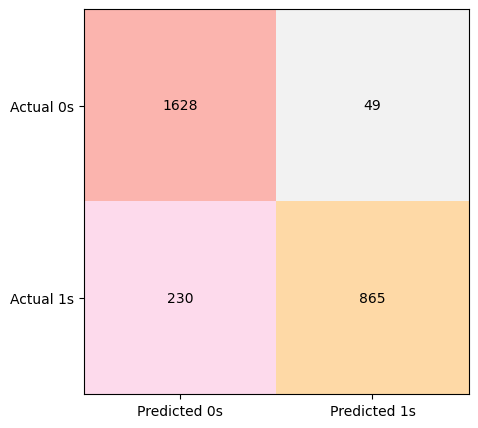

In [109]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap = "Pastel1_r")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [110]:
from sklearn.model_selection import cross_val_score
print("Train dataset:",round(cross_val_score(bn,X_train,y_train,cv=5).mean(),2))
print("Test dataset:",round(cross_val_score(bn,X_test,y_test,cv=5).mean(),2))

Train dataset: 0.89
Test dataset: 0.9


# Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
y_predict = dc.predict(X_test)

### Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix
cmatrix=confusion_matrix(y_test,y_predict)

print(cmatrix)

[[1566  111]
 [  97  998]]


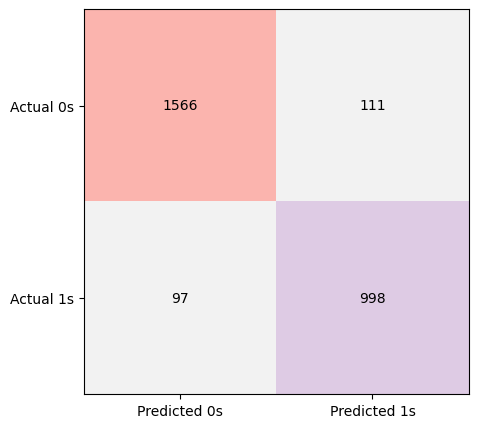

In [114]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cmatrix, cmap = "Pastel1_r")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black')
plt.show()

### Classification Report

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1677
           1       0.90      0.91      0.91      1095

    accuracy                           0.92      2772
   macro avg       0.92      0.92      0.92      2772
weighted avg       0.93      0.92      0.93      2772



In [116]:
from sklearn.model_selection import cross_val_score
print("Train dataset:",round(cross_val_score(dc,X_train,y_train,cv=5).mean(),2))
print("Test dataset:",round(cross_val_score(dc,X_test,y_test,cv=5).mean(),2))

Train dataset: 0.91
Test dataset: 0.92


* Accuracy On Decision Tree = 92 % 

## Best Fit model

### Logistic Regression shows Highest Accuracy = 94 %